# Import các thư viện cần thiết

In [2]:
import numpy as np
import pandas as pd
from time import time
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, LSTM, GRU, Bidirectional
from sklearn.metrics import accuracy_score, f1_score, classification_report

# 1. Data preprocessing

# 1.1 Đọc dữ liệu

In [3]:
df = pd.read_csv('./bank-full.csv', sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
# hiển thị thông tin các cột dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# hiển thị mô tả
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
# kiểm tra giá trị bị thiếu NaN
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
# kiểm tra các hàng trùng lập
df.duplicated().sum()

0

<Axes: >

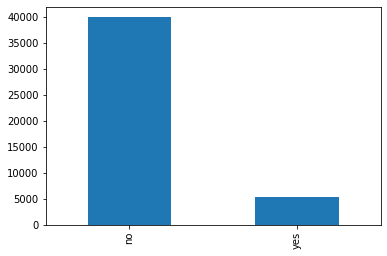

In [8]:
# vẽ biểu đồ để xem phân bố các class có đồng đều không
# => kết quả cho thấy class "no" chiếm tỉ lệ cao hơn rất nhiều so với "yes"
g = df['y'].value_counts()
g.plot.bar()

# 1.2 Xóa cột không mang nhiều ý nghĩa 

In [9]:
df = df.drop(['day', 'month'], axis=1)
df

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,508,4,-1,0,unknown,no


# 1.3 Chuyển dữ liệu dạng object thành int

In [10]:
columns = df.columns
types = df.dtypes
print(columns)
print(types)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [11]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
for i in range(len(types)):
    if types[i]=='object':
        le.fit_transform(df[columns[i]])
        df[columns[i]] = le.transform(df[columns[i]])
df

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,508,4,-1,0,3,0


# 1.4 Chuẩn hóa dữ liệu

In [12]:
data = df.values
print(data[:2])

[[  58    4    1    2    0 2143    1    0    2  261    1   -1    0    3
     0]
 [  44    9    2    1    0   29    1    0    2  151    1   -1    0    3
     0]]


In [13]:
X = data[:,:-1]
y = data[:,-1]
print(X.shape)
print(y.shape)

(45211, 14)
(45211,)


In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

print(X_scaled[:2])
print(y[:2])

[[0.51948052 0.36363636 0.5        0.66666667 0.         0.09225936
  1.         0.         1.         0.05307035 0.         0.
  0.         1.        ]
 [0.33766234 0.81818182 1.         0.33333333 0.         0.07306666
  1.         0.         1.         0.03070354 0.         0.
  0.         1.        ]]
[0 0]


# 1.5 Chia dữ liệu thành tập train và test với tỉ lệ 8:2

In [15]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành 2 bộ train và test với tỷ lệ 80/20
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Tiếp tục chia bộ train thành 2 bộ train và validation với tỷ lệ 90/10
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print('Train:', X_train.shape, y_train.shape)
print('Validation:', X_val.shape, y_val.shape)
print('Test:', X_test.shape, y_test.shape)

Train: (28934, 14) (28934,)
Validation: (7234, 14) (7234,)
Test: (9043, 14) (9043,)


# 2. Xây dựng các model học sâu

## 2.1 Model RNN

In [16]:
model_RNN = Sequential([
    SimpleRNN(128, input_shape=(X_train.shape[1],1), activation='relu', return_sequences=True),
    Dropout(0.1),
    SimpleRNN(64, activation='relu', return_sequences=True),
    Dropout(0.1),
    SimpleRNN(32, activation='relu', return_sequences=False),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])
model_RNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_RNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 14, 128)           16640     
                                                                 
 dropout (Dropout)           (None, 14, 128)           0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 14, 64)            12352     
                                                                 
 dropout_1 (Dropout)         (None, 14, 64)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 3

## 2.2 Model LSTM

In [17]:
model_LSTM = Sequential([
    LSTM(128, input_shape=(X_train.shape[1],1), activation='relu', return_sequences=True),
    Dropout(0.1),
    LSTM(64, activation='relu', return_sequences=True),
    Dropout(0.1),
    LSTM(32, activation='relu', return_sequences=False),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])
model_LSTM.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_LSTM.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 128)           66560     
                                                                 
 dropout_3 (Dropout)         (None, 14, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 14, 64)            49408     
                                                                 
 dropout_4 (Dropout)         (None, 14, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                

## 2.3 Model GRU

In [18]:
model_GRU = Sequential([
    GRU(128, input_shape=(X_train.shape[1],1), activation='relu', return_sequences=True),
    Dropout(0.1),
    GRU(64, activation='relu', return_sequences=True),
    Dropout(0.1),
    GRU(32, activation='relu', return_sequences=False),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])
model_GRU.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_GRU.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 14, 128)           50304     
                                                                 
 dropout_6 (Dropout)         (None, 14, 128)           0         
                                                                 
 gru_1 (GRU)                 (None, 14, 64)            37248     
                                                                 
 dropout_7 (Dropout)         (None, 14, 64)            0         
                                                                 
 gru_2 (GRU)                 (None, 32)                9408      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                

## 2.4 Model BiLSTM

In [19]:
model_BiLSTM = Sequential([
    Bidirectional(LSTM(128, activation='relu', return_sequences=True), input_shape=(X_train.shape[1],1)),
    Dropout(0.1),
    Bidirectional(LSTM(64, activation='relu', return_sequences=True)),
    Dropout(0.1),
    Bidirectional(LSTM(32, activation='relu', return_sequences=False)),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])
model_BiLSTM.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_BiLSTM.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 14, 256)          133120    
 l)                                                              
                                                                 
 dropout_9 (Dropout)         (None, 14, 256)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 14, 128)          164352    
 nal)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 14, 128)           0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                      

## 2.5 Tạo dictionary để huấn luyện cho các model

In [20]:
models = {
    'KNN': KNeighborsClassifier(),
    'DT': DecisionTreeClassifier(),
    'RF': RandomForestClassifier(),
    'LR': LogisticRegression(),
    'NB': GaussianNB(),
    'SVC': SVC(),
    'RNN': model_RNN,
    'LSTM': model_LSTM,
    'GRU': model_GRU,
    'BiLSTM': model_BiLSTM
}

# 3. Huấn luyện và dự đoán cho các model

In [21]:
# hàm để vẽ đồ thị quá trình training của các model
def plot_History(history):
    plt.figure(figsize=(20,13))
    plt.subplot(2,2,1)
    plt.title('Accuracy')
    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.legend()

    plt.subplot(2,2,2)
    plt.title('Loss')
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.legend()
    plt.show()

++++++++++++++++++++     KNN     ++++++++++++++++++++
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.55      0.28      0.38      1091

    accuracy                           0.89      9043
   macro avg       0.73      0.63      0.66      9043
weighted avg       0.87      0.89      0.87      9043


++++++++++++++++++++     DT     ++++++++++++++++++++
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      7952
           1       0.42      0.41      0.42      1091

    accuracy                           0.86      9043
   macro avg       0.67      0.67      0.67      9043
weighted avg       0.86      0.86      0.86      9043


++++++++++++++++++++     RF     ++++++++++++++++++++
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.63      0.36      0.46      1091

    accuracy        

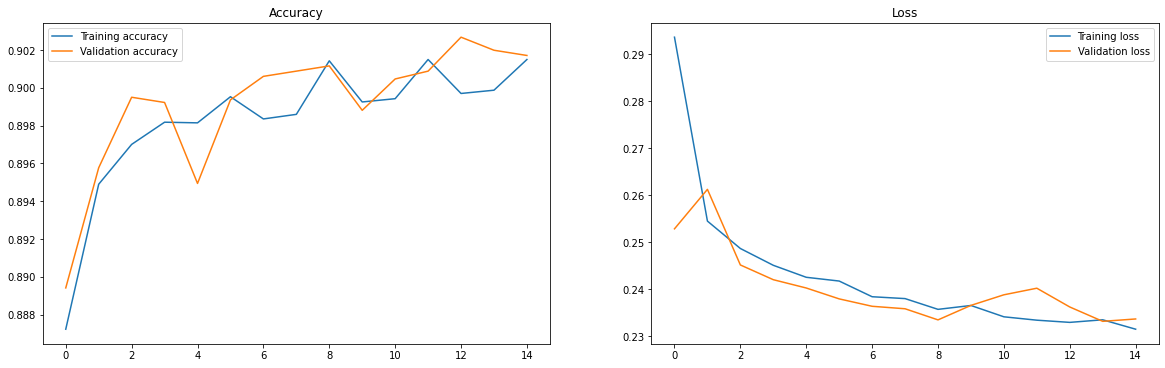

283/283 [==============================] - 2s 4ms/step
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.66      0.29      0.41      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.64      0.67      9043
weighted avg       0.88      0.90      0.88      9043


++++++++++++++++++++     LSTM     ++++++++++++++++++++
Epoch 1/15
905/905 [==============================] - 48s 47ms/step - loss: 0.3633 - accuracy: 0.8837 - val_loss: 0.3599 - val_accuracy: 0.8822
Epoch 2/15
905/905 [==============================] - 42s 46ms/step - loss: 0.3426 - accuracy: 0.8844 - val_loss: 0.3396 - val_accuracy: 0.8822
Epoch 3/15
905/905 [==============================] - 41s 46ms/step - loss: 0.3363 - accuracy: 0.8844 - val_loss: 0.3344 - val_accuracy: 0.8822
Epoch 4/15
905/905 [==============================] - 43s 47ms/step - loss: 0.3319 - accuracy: 0.8844 - val_loss: 0.3293 - val_acc

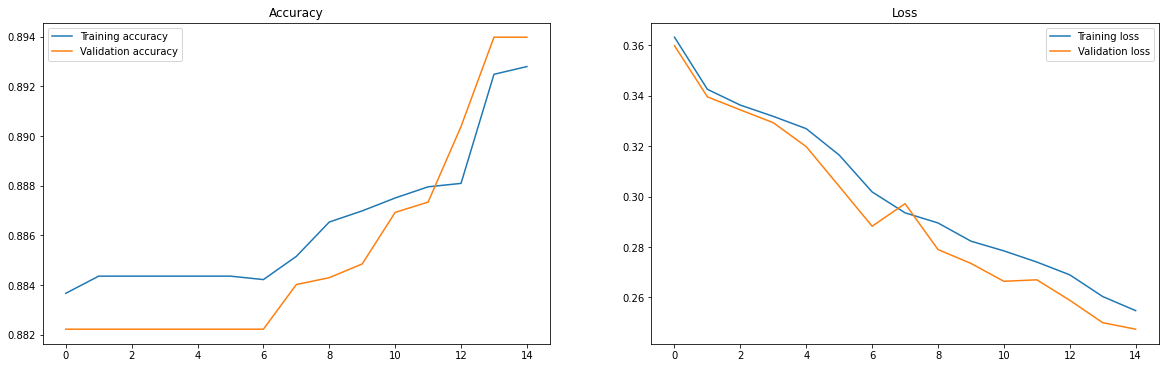

283/283 [==============================] - 4s 12ms/step
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7952
           1       0.57      0.41      0.48      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.68      0.71      9043
weighted avg       0.88      0.89      0.88      9043


++++++++++++++++++++     GRU     ++++++++++++++++++++
Epoch 1/15
905/905 [==============================] - 42s 40ms/step - loss: 0.3475 - accuracy: 0.8842 - val_loss: 0.3291 - val_accuracy: 0.8822
Epoch 2/15
905/905 [==============================] - 37s 41ms/step - loss: 0.3090 - accuracy: 0.8844 - val_loss: 0.2918 - val_accuracy: 0.8822
Epoch 3/15
905/905 [==============================] - 36s 40ms/step - loss: 0.2953 - accuracy: 0.8844 - val_loss: 0.2828 - val_accuracy: 0.8825
Epoch 4/15
905/905 [==============================] - 38s 42ms/step - loss: 0.2893 - accuracy: 0.8845 - val_loss: 0.2749 - val_acc

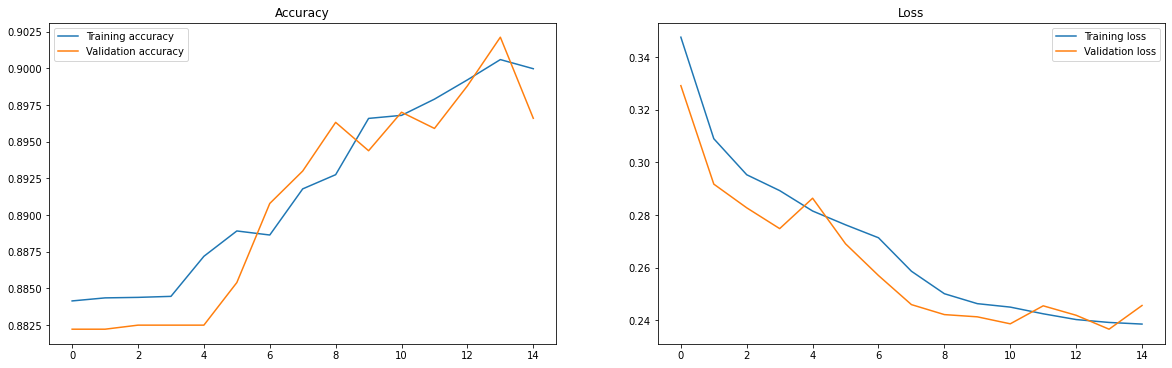

283/283 [==============================] - 3s 9ms/step
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7952
           1       0.56      0.50      0.53      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.72      0.73      9043
weighted avg       0.89      0.89      0.89      9043


++++++++++++++++++++     BiLSTM     ++++++++++++++++++++
Epoch 1/15
905/905 [==============================] - 105s 105ms/step - loss: 0.3527 - accuracy: 0.8838 - val_loss: 0.3325 - val_accuracy: 0.8822
Epoch 2/15
905/905 [==============================] - 96s 106ms/step - loss: 0.3209 - accuracy: 0.8845 - val_loss: 0.3041 - val_accuracy: 0.8868
Epoch 3/15
905/905 [==============================] - 92s 101ms/step - loss: 0.2983 - accuracy: 0.8919 - val_loss: 0.2952 - val_accuracy: 0.8862
Epoch 4/15
905/905 [==============================] - 96s 106ms/step - loss: 0.2884 - accuracy: 0.8930 - val_loss: 0.2978 - 

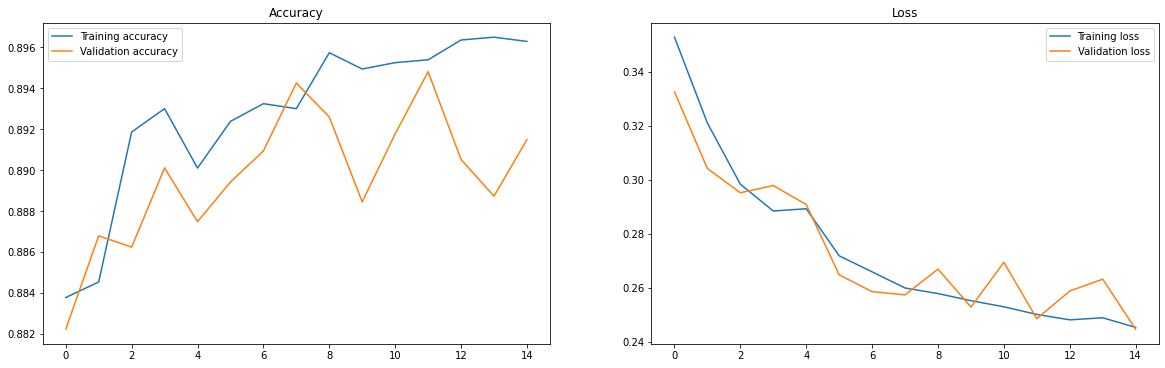

283/283 [==============================] - 8s 25ms/step
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7952
           1       0.71      0.18      0.28      1091

    accuracy                           0.89      9043
   macro avg       0.80      0.58      0.61      9043
weighted avg       0.87      0.89      0.86      9043




In [22]:
# training và testing
compare_model = {}      # dict chứa kết quả training và dự đoán

for name in models.keys():
    print('+'*20, '   ',name, '   ', '+'*20)
    # huấn luyện dữ liệu
    start = time()                  # thời gian bắt đầu
    if name in ['MLP', 'RNN', 'LSTM', 'GRU', 'BiLSTM']:
        history = models[name].fit(X_train, y_train, validation_data=(X_val, y_val),epochs=15, batch_size=32)
    else:
        models[name].fit(X_train, y_train)
    
    time_train = time() - start     # tính thời gian quá trình huấn luyện
    
    # vẽ history
    if name in ['MLP', 'RNN', 'LSTM', 'GRU', 'BiLSTM']:
        plot_History(history)
    
    # dự đoán dữ liệu
    start = time()                # thời gian bắt đầu
    y_pred = models[name].predict(X_test)
    time_test = time() - start    # tính thời gian quá trình dự đoán
    if name in ['MLP', 'RNN', 'LSTM', 'GRU', 'BiLSTM']:
        y_pred = [round(y[0]) for y in y_pred]  # suy luận ra class

    # tính độ chính xác
    acc = accuracy_score(y_true=y_test, y_pred=y_pred)
    f1 = f1_score(y_true=y_test, y_pred=y_pred, average='weighted')
    print(classification_report(y_true=y_test, y_pred=y_pred))

    # lưu kết quả để so sánh
    if name in ['MLP', 'RNN', 'LSTM', 'GRU', 'BiLSTM']:
        compare_model[name] = {'History': history,
                            'Accuracy' : acc, 
                            'F1_score' : f1, 
                            'Time_train': time_train, 
                            'Time_test': time_test}
    else:
        compare_model[name] = {'History': None,
                            'Accuracy' : acc, 
                            'F1_score' : f1, 
                            'Time_train': time_train, 
                            'Time_test': time_test}
    print()

# 4. Model evaluation

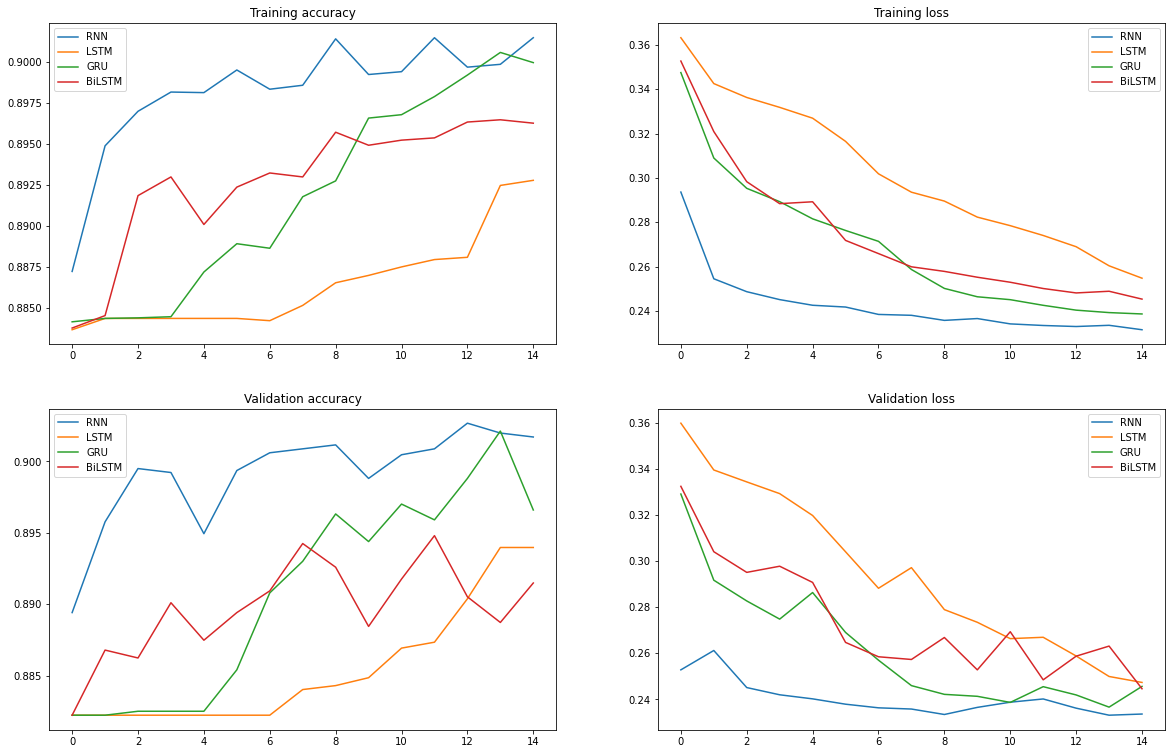

In [23]:
plt.figure(figsize=(20,13))
plt.subplot(2,2,1)
plt.title('Training accuracy')
for name in compare_model.keys():
    if name in ['MLP', 'RNN', 'LSTM', 'GRU', 'BiLSTM']:
        plt.plot(compare_model[name]['History'].history['accuracy'], label=name)
plt.legend()

plt.subplot(2,2,2)
plt.title('Training loss')
for name in compare_model.keys():
    if name in ['MLP', 'RNN', 'LSTM', 'GRU', 'BiLSTM']:
        plt.plot(compare_model[name]['History'].history['loss'], label=name)
plt.legend()

plt.subplot(2,2,3)
plt.title('Validation accuracy')
for name in compare_model.keys():
    if name in ['MLP', 'RNN', 'LSTM', 'GRU', 'BiLSTM']:
        plt.plot(compare_model[name]['History'].history['val_accuracy'], label=name)
plt.legend()

plt.subplot(2,2,4)
plt.title('Validation loss')
for name in compare_model.keys():
    if name in ['MLP', 'RNN', 'LSTM', 'GRU', 'BiLSTM']:
        plt.plot(compare_model[name]['History'].history['val_loss'], label=name)
plt.legend()

In [24]:
df_compare = pd.DataFrame(compare_model).T
df_compare.style.highlight_max(color = 'green', axis = 0, subset=['Accuracy','F1_score']
                ).highlight_min(color = 'red', axis = 0, subset=['Time_train','Time_test'])

,History,Accuracy,F1_score,Time_train,Time_test
KNN,nan,0.885989,0.869497,0.109364,2.866072
DT,nan,0.860997,0.860301,0.276865,0.009344
RF,nan,0.897047,0.884848,11.648937,0.345289
LR,nan,0.887427,0.859097,0.647359,0.000754
NB,nan,0.831693,0.841844,0.063047,0.003271
SVC,nan,0.887095,0.856065,15.604869,4.548975
RNN,,0.896163,0.878232,265.812176,1.780099
LSTM,,0.891408,0.883758,686.945942,3.959254
GRU,,0.892182,0.889473,556.893528,3.123544
BiLSTM,,0.891961,0.862267,1471.422686,11.482796


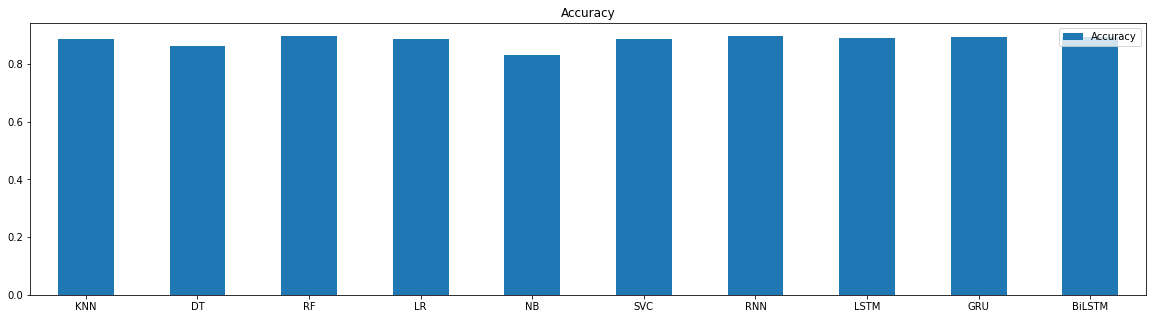

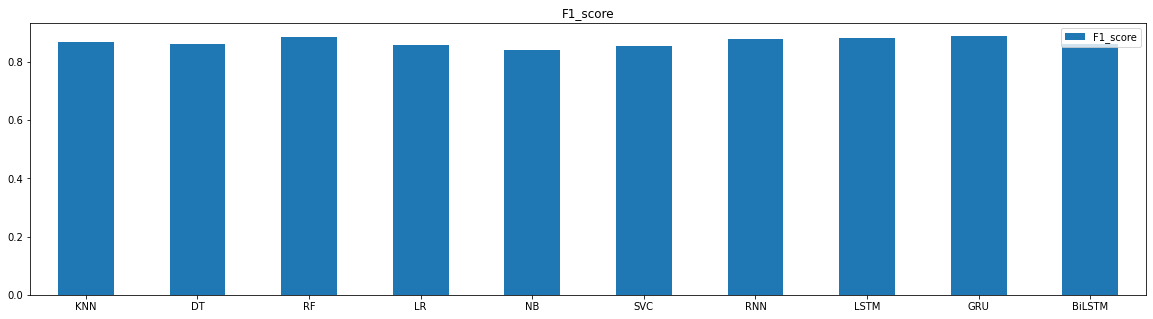

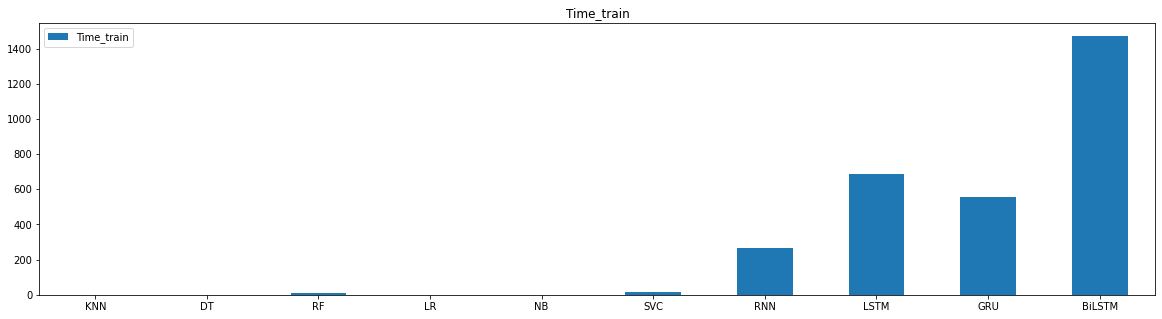

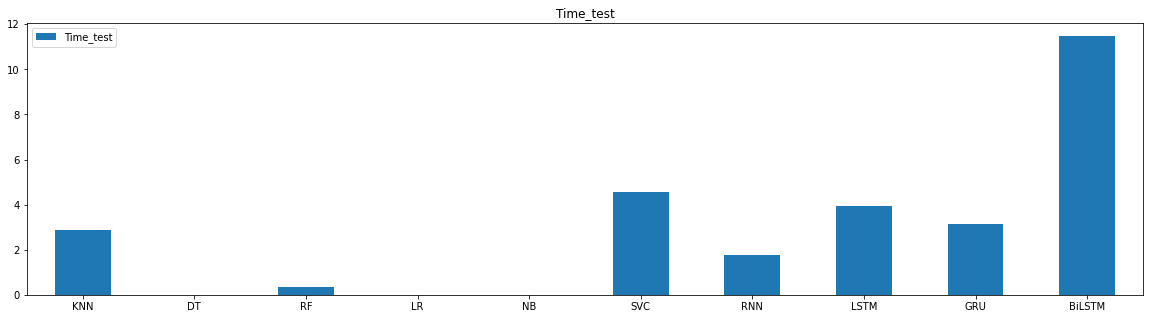

In [25]:
for i in df_compare.columns:
    if i != 'History':
        df_compare.plot(kind= 'bar', y=i, title=i, rot=0, figsize=(20,5))